In [141]:
import numpy as np

In [142]:
Ks = 2
Y = 2



def f(t, y, pars, X1, X2):
    S, I, P = y
    S0, k1, KS1, k2, KI2, mu12, Y12  = pars

    d = mu12

    dSdt = d * (S0 - S) - k1 * X1 * S / (KS1 + S) - mu12 * (X1 + X2) * Y12
    dIdt = k1 * X1 * S / (KS1 + S) - k2 * X2 * I / (KI2 + I) - d * I
    dPdt = k2 * X2 * I / (KI2 + I) - d * P

    return [dSdt, dIdt, dPdt]

In [143]:
S0 = 20
k1 = 0.2
KS1 = 0.1
k2 = 0.2
KI2 = 1
mu12 = 0.3
Y12 = 2

pars = [S0, k1, KS1, k2, KI2, mu12, Y12]

Text(0.5, 1.0, 'Max P at: 1.0235310218990263')

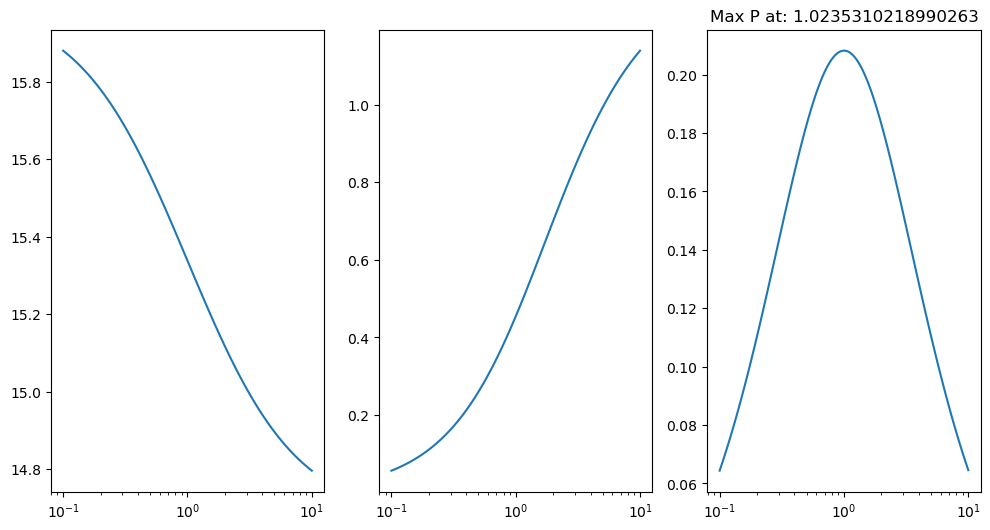

In [144]:
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

X1_over_X2_array = 10 ** np.linspace(-1, 1, 100)
ss_arr_1 = np.zeros((len(X1_over_X2_array), 3))

X_total = 2
x = [0, 0, 0]

for i, X1_over_X2 in enumerate(X1_over_X2_array):
    X1 = X1_over_X2 * X_total / (1 + X1_over_X2)
    X2 = X_total - X1

    x, infodict, ier, mesg = fsolve(lambda y: f(0, y, pars, X1, X2), x, full_output=True)
    # print(mesg)

    ss_arr_1[i, :] = x

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
ax = plt.subplot(131)
ax.semilogx(X1_over_X2_array, ss_arr_1[:, 0], label='S')

ax = plt.subplot(132)
ax.semilogx(X1_over_X2_array, ss_arr_1[:, 1], label='I')

ax = plt.subplot(133)
ax.semilogx(X1_over_X2_array, ss_arr_1[:, 2], label='P')
ax.set_title('Max P at: ' + str(X1_over_X2_array[np.argmax(ss_arr_1[:, 2])]))

Text(0.5, 1.0, 'Max P at: 0.6135907273413174')

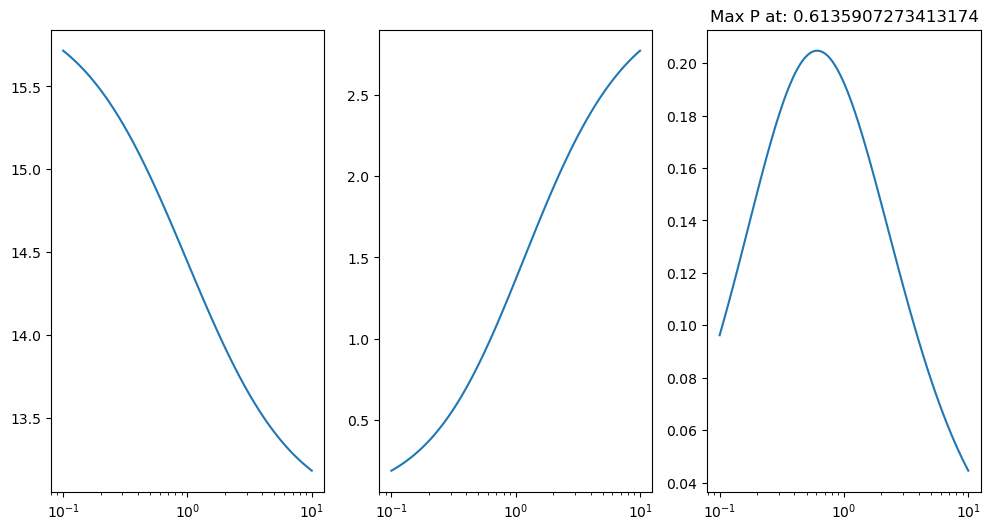

In [167]:
S0 = 20
k1 = 0.5
KS1 = 1
k2 = 0.1
KI2 = 1
mu12 = 0.3
Y12 = 2

pars = [S0, k1, KS1, k2, KI2, mu12, Y12]

from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

X1_over_X2_array = 10 ** np.linspace(-1, 1, 100)
ss_arr_2 = np.zeros((len(X1_over_X2_array), 3))

X_total = 2
x = [15, 1, 1]

for i, X1_over_X2 in enumerate(X1_over_X2_array):
    X1 = X1_over_X2 * X_total / (1 + X1_over_X2)
    X2 = X_total - X1

    x, infodict, ier, mesg = fsolve(lambda y: f(0, y, pars, X1, X2), x, full_output=True)
    # print(mesg)

    ss_arr_2[i, :] = x

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
ax = plt.subplot(131)
ax.semilogx(X1_over_X2_array, ss_arr_2[:, 0], label='S')

ax = plt.subplot(132)
ax.semilogx(X1_over_X2_array, ss_arr_2[:, 1], label='I')

ax = plt.subplot(133)
ax.semilogx(X1_over_X2_array, ss_arr_2[:, 2], label='P')
ax.set_title('Max P at: ' + str(X1_over_X2_array[np.argmax(ss_arr_2[:, 2])]))

Text(0.5, 1.0, 'Max P at: 1.7073526474706913')

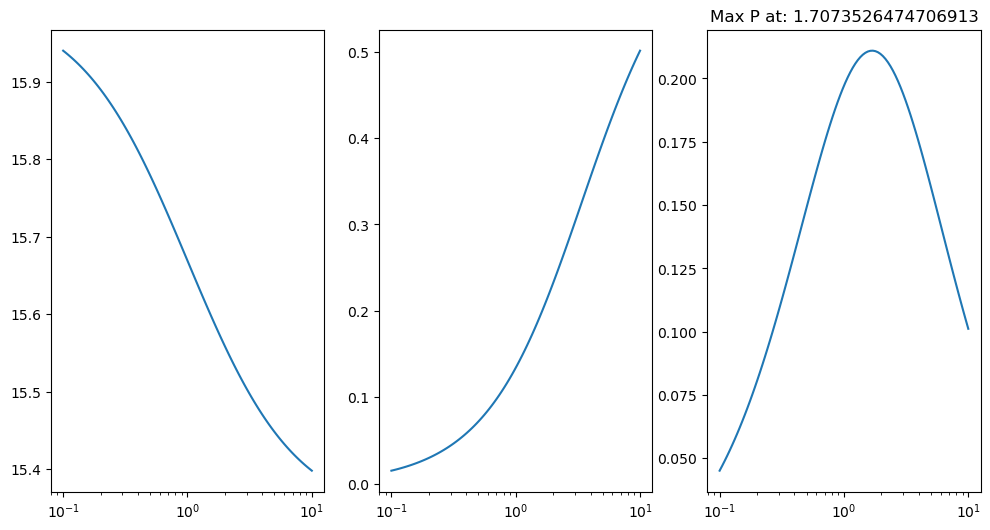

In [170]:
S0 = 20
k1 = 0.1
KS1 = 0.1
k2 = 0.5
KI2 = 1
mu12 = 0.3
Y12 = 2

pars = [S0, k1, KS1, k2, KI2, mu12, Y12]

from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

X1_over_X2_array = 10 ** np.linspace(-1, 1, 100)
ss_arr_3 = np.zeros((len(X1_over_X2_array), 3))

X_total = 2
x = [15, 1, 1]

for i, X1_over_X2 in enumerate(X1_over_X2_array):
    X1 = X1_over_X2 * X_total / (1 + X1_over_X2)
    X2 = X_total - X1

    x, infodict, ier, mesg = fsolve(lambda y: f(0, y, pars, X1, X2), x, full_output=True)
    # print(mesg)

    ss_arr_3[i, :] = x

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
ax = plt.subplot(131)
ax.semilogx(X1_over_X2_array, ss_arr_3[:, 0], label='S')

ax = plt.subplot(132)
ax.semilogx(X1_over_X2_array, ss_arr_3[:, 1], label='I')

ax = plt.subplot(133)
ax.semilogx(X1_over_X2_array, ss_arr_3[:, 2], label='P')
ax.set_title('Max P at: ' + str(X1_over_X2_array[np.argmax(ss_arr_3[:, 2])]))

[None, None, None, None]

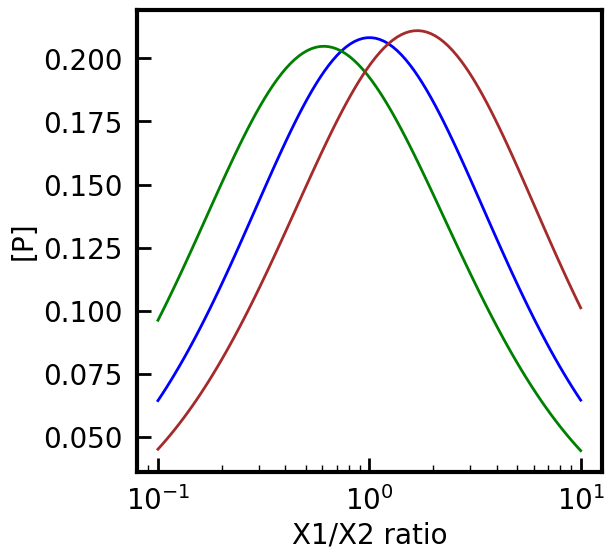

In [193]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.semilogx(X1_over_X2_array, ss_arr_1[:, 2], label='k1 = 0.2, k2 = 0.2', color='blue', linewidth=2)
ax.semilogx(X1_over_X2_array, ss_arr_2[:, 2], label='k1 = 0.5, k2 = 0.1', color='green', linewidth=2)
ax.semilogx(X1_over_X2_array, ss_arr_3[:, 2], label='k1 = 0.1, k2 = 0.5', color='brown', linewidth=2)
ax.set_xlabel('X1/X2 ratio', fontsize=20)
ax.set_ylabel('[P]', fontsize=20)
ax.tick_params(which='major', labelsize=20, pad=10, length=10, width=2, direction='in')
ax.tick_params(which='minor', labelsize=20, pad=10, length=5, width=1, direction='in')
[i.set_linewidth(3) for i in ax.spines.values()]
